<h1>Root Cause Analysis Using Pareto Principle</h1>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

<h2>Step 1: Load dataset from csv</h2>

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
df

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


<h2>Step 2a: Data Cleaning: Drop duplicate rows</h2>

In [7]:
df = df.drop_duplicates()
# df

<h2>Step 2b: Data Cleaning: Check missisng values</h2>

In [8]:
df.isnull().sum()
# no missing values

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [10]:
numerical_cols

Index(['Year', 'Production (GWh)', 'Installed Capacity (MW)',
       'Investments (USD)', 'Population', 'GDP', 'Energy Consumption',
       'Energy Exports', 'Energy Imports', 'CO2 Emissions',
       'Renewable Energy Jobs', 'Government Policies', 'R&D Expenditure',
       'Renewable Energy Targets', 'Average Annual Temperature',
       'Annual Rainfall', 'Solar Irradiance', 'Wind Speed', 'Hydro Potential',
       'Geothermal Potential', 'Biomass Availability',
       'Energy Storage Capacity', 'Grid Integration Capability',
       'Electricity Prices', 'Energy Subsidies',
       'International Aid for Renewables', 'Public Awareness',
       'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization',
       'Renewable Energy Patents', 'Educational Level',
       'Technology Transfer Agreements', 'Renewable Energy Education Programs',
       'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipment',
       'Export Incent

In [11]:
# Calculate the correlation matrix; Not part of the Pareto analysis
corr_matrix = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 'Renewable Energy Jobs','Energy Sector Workforce', 'Energy Consumption', 'CO2 Emissions', 'Energy Imports', 'Energy Exports', 'Production (GWh)', 'Installed Capacity (MW)', 'Number of Renewable Energy Publications', 'Energy Storage Capacity', 'Number of Research Institutions', 'Renewable Energy Patents',  'Export Incentives for Energy Equipment', 'Economic Freedom Index']].corr()

<h2>Step 3: Aggregation of 20 Highest Socio-economic Indicators in Terms of Mean Scores</h2> 

In [12]:
# Aggregate data: calculate mean for each factor to analyze their impact
aggregated_data = df.agg({
    'GDP': 'mean',
    'R&D Expenditure': 'mean',
    'Investments (USD)': 'mean', 
    'Population': 'mean', 
    'International Aid for Renewables': 'mean', 
    'Energy Subsidies': 'mean', 
    'Renewable Energy Jobs': 'mean',
    'Energy Sector Workforce': 'mean', 
    'Energy Consumption': 'mean', 
    'CO2 Emissions': 'mean', 
    'Energy Imports': 'mean', 
    'Energy Exports': 'mean', 
    'Production (GWh)': 'mean', 
    'Installed Capacity (MW)': 'mean', 
    'Number of Renewable Energy Publications': 'mean', 
    'Energy Storage Capacity': 'mean', 
    'Number of Research Institutions': 'mean', 
    'Renewable Energy Patents': 'mean',  
    'Export Incentives for Energy Equipment': 'mean', 
    'Economic Freedom Index': 'mean'
}).reset_index()


In [13]:
aggregated_data

,index,0
0,GDP,1.010745e+14
1,R&D Expenditure,5.004689e+09
2,Investments (USD),4.956155e+09
3,Population,7.458927e+08
4,International Aid for Renewables,5.089057e+08
5,Energy Subsidies,5.003271e+08
6,Renewable Energy Jobs,5.028961e+05
7,Energy Sector Workforce,5.020409e+05
8,Energy Consumption,4.957012e+05
9,CO2 Emissions,4.912184e+05


In [14]:
# Rename the index for clarity
aggregated_data.columns = ['Factor', 'Total']

In [15]:
aggregated_data

,Factor,Total
0,GDP,1.010745e+14
1,R&D Expenditure,5.004689e+09
2,Investments (USD),4.956155e+09
3,Population,7.458927e+08
4,International Aid for Renewables,5.089057e+08
5,Energy Subsidies,5.003271e+08
6,Renewable Energy Jobs,5.028961e+05
7,Energy Sector Workforce,5.020409e+05
8,Energy Consumption,4.957012e+05
9,CO2 Emissions,4.912184e+05


<h2>Step 4: Sort the data based on the 'Total' column in descending order</h2>

In [16]:
# Sort the data based on the 'Total' column in descending order
sorted_data = aggregated_data.sort_values(by='Total', ascending=False)

<h2>Step 5: Calculate cumulative frequency</h2>

In [17]:
sorted_data['Cumulative Frequency'] = sorted_data['Total'].cumsum()

<h2>Step 6: Calculate cumulative percentage</h2>

In [18]:
# Calculate cumulative percentage
sorted_data['Cumulative Percentage'] = (sorted_data['Cumulative Frequency'] / 
                                         sorted_data['Total'].sum()) * 100

<h2>Step 7: Assign ranks based on sorted order</h2>

In [19]:
# Assign ranks based on sorted order
sorted_data['Ranking'] = range(1, len(sorted_data) + 1)

In [20]:
# Display the sorted and calculated data
sorted_data.reset_index(drop=True, inplace=True)
sorted_data

,Factor,Total,Cumulative Frequency,Cumulative Percentage,Ranking
0,GDP,1.010745e+14,1.010745e+14,99.988408,1
1,R&D Expenditure,5.004689e+09,1.010795e+14,99.993359,2
2,Investments (USD),4.956155e+09,1.010845e+14,99.998262,3
3,Population,7.458927e+08,1.010852e+14,99.998999,4
4,International Aid for Renewables,5.089057e+08,1.010857e+14,99.999503,5
5,Energy Subsidies,5.003271e+08,1.010862e+14,99.999998,6
6,Renewable Energy Jobs,5.028961e+05,1.010862e+14,99.999998,7
7,Energy Sector Workforce,5.020409e+05,1.010862e+14,99.999999,8
8,Energy Consumption,4.957012e+05,1.010862e+14,99.999999,9
9,CO2 Emissions,4.912184e+05,1.010862e+14,100.000000,10


<h2>Step 8: Create Pareto Chart</h2>

Text(0.5, 0, 'Factors')

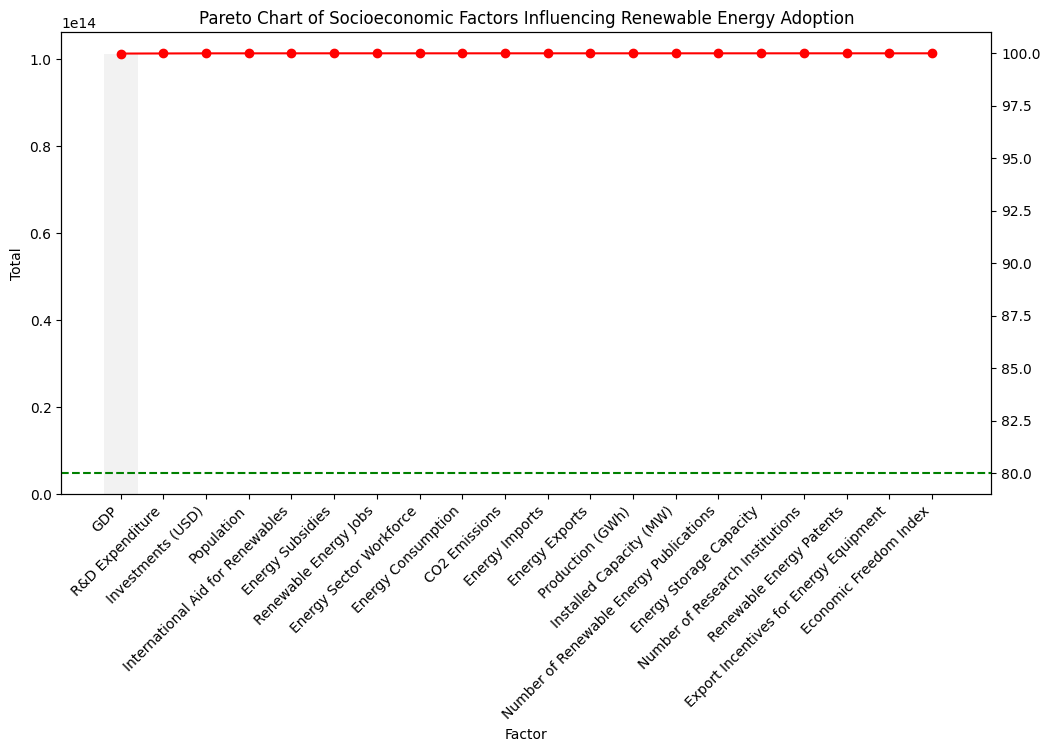

In [21]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')

# Bar plot for each factor's total contribution
sns.barplot(x='Factor', y='Total', data=sorted_data, color='#f2f2f2')

# Add cumulative percentage line
plt.twinx()
plt.plot(sorted_data['Factor'], sorted_data['Cumulative Percentage'], color='red', marker='o', label='Cumulative Percentage')
plt.axhline(80, color='green', linestyle='--', label='80% Line')

# Title and labels
plt.title('Pareto Chart of Socioeconomic Factors Influencing Renewable Energy Adoption')
plt.xlabel('Factors')

<h3>Aggregation without GDP to show distribution of other factors</h3>

In [22]:
# Remove the GDP row in the dataframe aggregated_data
new_agg_data = aggregated_data.drop([0])

In [23]:
# Sort the data based on the 'Total' column in descending order
new_sorted_data = new_agg_data.sort_values(by='Total', ascending=False)

In [24]:
# Calculate cumulative frequency
new_sorted_data['Cumulative Frequency'] = new_sorted_data['Total'].cumsum()

In [25]:
# Calculate cumulative percentage
new_sorted_data['Cumulative Percentage'] = (new_sorted_data['Cumulative Frequency'] / 
                                         new_sorted_data['Total'].sum()) * 100

In [26]:
# Assign ranks based on sorted order
new_sorted_data['Ranking'] = range(1, len(new_sorted_data) + 1)

In [27]:
# Display the sorted and calculated data
new_sorted_data.reset_index(drop=True, inplace=True)

<h3>Pareto Chart of Socioeconomic Factors without GDP</h3>

Text(0.5, 0, 'Socio-economic Factors')

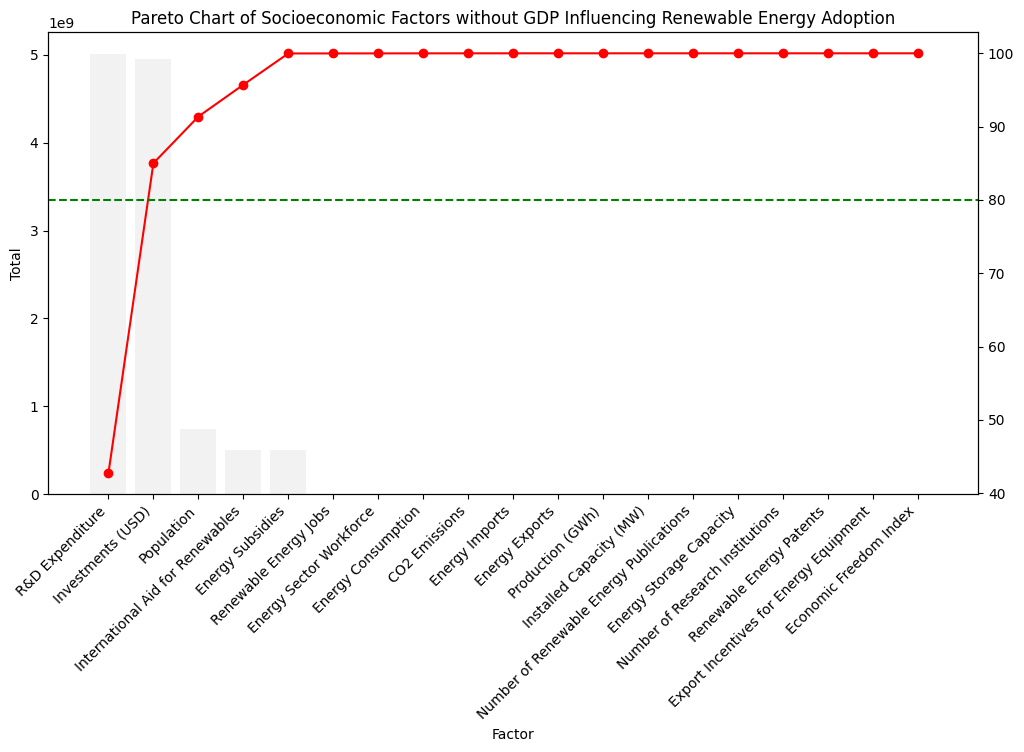

In [28]:
# Create the Pareto Chart
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')

# Bar plot for each factor's total contribution
sns.barplot(x='Factor', y='Total', data=new_sorted_data, color='#f2f2f2')

# Add cumulative percentage line
plt.twinx()
plt.plot(new_sorted_data['Factor'], new_sorted_data['Cumulative Percentage'], color='red', marker='o', label='Cumulative Percentage')
plt.axhline(80, color='green', linestyle='--', label='80% Line')

# Title and labels
plt.title('Pareto Chart of Socioeconomic Factors without GDP Influencing Renewable Energy Adoption')
plt.xlabel('Socio-economic Factors')

In [29]:
# Display the Pareto Table
new_sorted_data

,Factor,Total,Cumulative Frequency,Cumulative Percentage,Ranking
0,R&D Expenditure,5.004689e+09,5.004689e+09,42.708895,1
1,Investments (USD),4.956155e+09,9.960844e+09,85.003608,2
2,Population,7.458927e+08,1.070674e+10,91.368889,3
3,International Aid for Renewables,5.089057e+08,1.121564e+10,95.711777,4
4,Energy Subsidies,5.003271e+08,1.171597e+10,99.981456,5
5,Renewable Energy Jobs,5.028961e+05,1.171647e+10,99.985748,6
6,Energy Sector Workforce,5.020409e+05,1.171697e+10,99.990032,7
7,Energy Consumption,4.957012e+05,1.171747e+10,99.994262,8
8,CO2 Emissions,4.912184e+05,1.171796e+10,99.998454,9
9,Energy Imports,5.080037e+04,1.171801e+10,99.998888,10


<h4>Findings</h4>

<p>According to the Pareto Principle (80/20 rule), focus on the top factors that account for approximately 80% of the effects. In this case, GDP, R&D Expenditure, and Investments (USD) may emerge as the vital views that must be considered.</p>

In [30]:
# Pareto 2

In [31]:
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)
# Random sample dataset rows
sampled_numeric_df = numeric_df.sample(n=400, random_state=42)

In [32]:
# Pareto 2

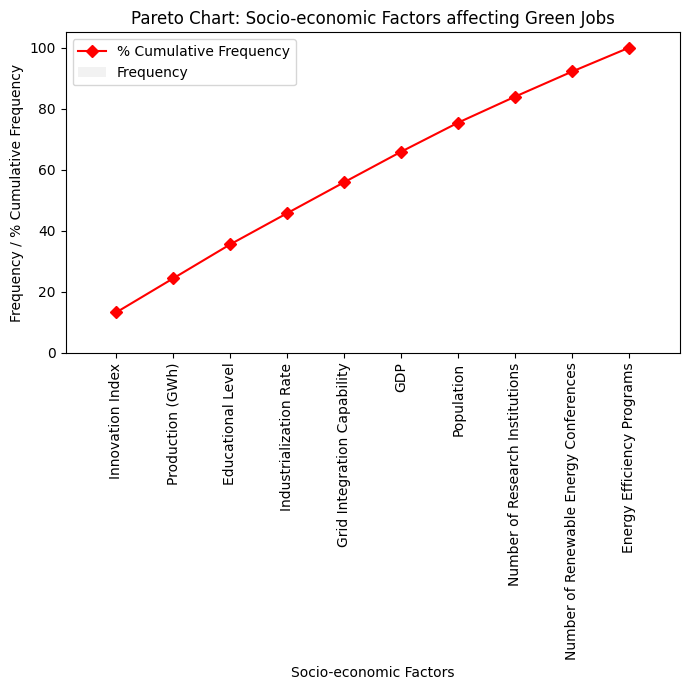

                   Socio-economic Factors  Correlation  Frequency  \
0                        Innovation Index     0.045627   0.045627   
1                        Production (GWh)     0.038296   0.038296   
2                       Educational Level     0.038253   0.038253   
3                  Industrialization Rate     0.035100   0.035100   
4             Grid Integration Capability     0.034835   0.034835   
5                                     GDP     0.034364   0.034364   
6                              Population     0.032715   0.032715   
7         Number of Research Institutions     0.029273   0.029273   
8  Number of Renewable Energy Conferences     0.028191   0.028191   
9              Energy Efficiency Programs     0.026896   0.026896   

   Cumulative Frequency  % Cumulative Frequency  
0              0.045627               13.281056  
1              0.083923               24.428064  
2              0.122176               35.562788  
3              0.157276               45

In [35]:
# Assuming 'Green Jobs' is the column of interest and other columns are socio-economic factors
# We'll calculate the correlation between 'Green Jobs' and other columns
corr_matrix = numeric_df.corr()
corr_with_green_jobs = corr_matrix['Renewable Energy Jobs'].abs().sort_values(ascending=False)

# Select the top 10 socio-economic factors with the highest correlation with 'Green Jobs'
top_factors = corr_with_green_jobs[1:11]  # exclude 'Green Jobs' itself

# Create a new DataFrame with the top factors and their corresponding correlation values
pareto_df = pd.DataFrame({'Socio-economic Factors': top_factors.index, 
                          'Correlation': top_factors.values})

# Calculate the cumulative frequency and percentage
pareto_df['Frequency'] = pareto_df['Correlation']
pareto_df['Cumulative Frequency'] = pareto_df['Frequency'].cumsum()
pareto_df['% Cumulative Frequency'] = (pareto_df['Cumulative Frequency'] / pareto_df['Frequency'].sum()) * 100

# Create the Pareto chart
plt.figure(figsize=(7, 7))

# sns.barplot(x='Factor', y='Total', data=new_sorted_data, color='#f2f2f2')

plt.bar(pareto_df['Socio-economic Factors'], pareto_df['Frequency'], label='Frequency', color='#f2f2f2')
plt.plot(pareto_df['Socio-economic Factors'], pareto_df['% Cumulative Frequency'], marker='D', linestyle='-', color='red', label='% Cumulative Frequency')
plt.xlabel('Socio-economic Factors')
plt.ylabel('Frequency / % Cumulative Frequency')
plt.title('Pareto Chart: Socio-economic Factors affecting Green Jobs')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the Pareto analysis result
print(pareto_df)

In [34]:
pareto_df

,Socio-economic Factors,Correlation,Frequency,Cumulative Frequency,% Cumulative Frequency
0,Innovation Index,0.045627,0.045627,0.045627,13.281056
1,Production (GWh),0.038296,0.038296,0.083923,24.428064
2,Educational Level,0.038253,0.038253,0.122176,35.562788
3,Industrialization Rate,0.035100,0.035100,0.157276,45.779551
4,Grid Integration Capability,0.034835,0.034835,0.192112,55.919363
5,GDP,0.034364,0.034364,0.226476,65.922080
6,Population,0.032715,0.032715,0.259191,75.444667
7,Number of Research Institutions,0.029273,0.029273,0.288463,83.965255
8,Number of Renewable Energy Conferences,0.028191,0.028191,0.316655,92.171140
9,Energy Efficiency Programs,0.026896,0.026896,0.343551,100.000000
